## 1h wind temporal power spectrum

Last update 2024-07-10

This notebooks shows how to load several NEMO NANUK4 experiments and compute the temporal power specrtum of a given variable (here 10m wind from the ABL module) average over a given subregion.
Also plot 4-panel figures of maps from 4 experiments, zoomed or full arctic.

In [1]:
## standart libraries

import os,sys
import sys

import numpy as np
from scipy import stats
import pandas as pd

# xarray
import xarray as xr


# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


sys.path.append('/gpfswork/rech/cli/regi915/DEVGIT/xscale/')
import xscale


# custom tools for analysis and plots
sys.path.append('/gpfswork/rech/cli/regi915/DEVGIT/ABL4SI/NOTEBOOKS/')
from libseaice import libseaice as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libseaice.libseaice
Package: libseaice
This is a collection of  tools i often use when analysing sea ice NEMO based outputs.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


## Setup

In [2]:
# output dir for plots
diro="/gpfswork/rech/cli/regi915/PLT/2024-07/904/"

# prefix of NEMO simulations
prefix="NANUK4_ICE_ABL-"

# common characteristics
# frequence of output to read
freq="1h"

# directory where to find the NEMO simulations
diribase="/gpfsstore/rech/cli/regi915/NEMO/NANUK4/"
# directory where to find the grid info of the NEMO simulations
dirigrid="/gpfsstore/rech/cli/regi915/NEMO/NANUK4/NANUK4.L31-I/"
# path where to find the dist2coast mask file
distmask = xr.open_dataset("/gpfsstore/rech/cli/commun/NANUK4/DATASETS/dist2coast/mask_RGPS_all.nc")


## Load the given list of simulations:

In [3]:
# list of experiments to consider

experiments = [
    {"frc": "ABL", "rheol": "EVP", "nb": "903", "loadice": True, "loadoce": False, "loadall": True},
    {"frc": "BLK", "rheol": "EVP", "nb": "903", "loadice": True, "loadoce": True, "loadall": False},
    {"frc": "ABL", "rheol": "BBM", "nb": "903", "loadice": True, "loadoce": False, "loadall": True},
    {"frc": "BLK", "rheol": "BBM", "nb": "903", "loadice": True, "loadoce": True, "loadall": False},
    {"frc": "ABL", "rheol": "BBM", "nb": "904", "loadice": True, "loadoce": False, "loadall": True},
    {"frc": "BLK", "rheol": "BBM", "nb": "904", "loadice": True, "loadoce": True, "loadall": False}
]

# Loading the data corresponding to these experiments:
allexps = li.Fload_experiments(experiments, diribase,freq=freq)

===== preapring to load experiment: ABLEVP903
Loading ice files : /gpfsstore/rech/cli/regi915/NEMO/NANUK4/NANUK4_ICE_ABL-ABLEVP903-S/*/NANUK4_ICE_ABL-ABLEVP903_1h_*_icemod.nc
Loading oce files : /gpfsstore/rech/cli/regi915/NEMO/NANUK4/NANUK4_ICE_ABL-ABLEVP903-S/*/NANUK4_ICE_ABL-ABLEVP903_1h_*_grid_T.nc
Loading abl files : /gpfsstore/rech/cli/regi915/NEMO/NANUK4/NANUK4_ICE_ABL-ABLEVP903-S/*/NANUK4_ICE_ABL-ABLEVP903_1h_*_ABL.nc
===== preapring to load experiment: BLKEVP903
Loading ice files : /gpfsstore/rech/cli/regi915/NEMO/NANUK4/NANUK4_ICE_ABL-BLKEVP903-S/*/NANUK4_ICE_ABL-BLKEVP903_1h_*_icemod.nc
Loading oce files : /gpfsstore/rech/cli/regi915/NEMO/NANUK4/NANUK4_ICE_ABL-BLKEVP903-S/*/NANUK4_ICE_ABL-BLKEVP903_1h_*_grid_T.nc
===== preapring to load experiment: ABLBBM903
Loading ice files : /gpfsstore/rech/cli/regi915/NEMO/NANUK4/NANUK4_ICE_ABL-ABLBBM903-S/*/NANUK4_ICE_ABL-ABLBBM903_1h_*_icemod.nc
Loading oce files : /gpfsstore/rech/cli/regi915/NEMO/NANUK4/NANUK4_ICE_ABL-ABLBBM903-S/*/NA

## Plot 4 panel maps all arctic

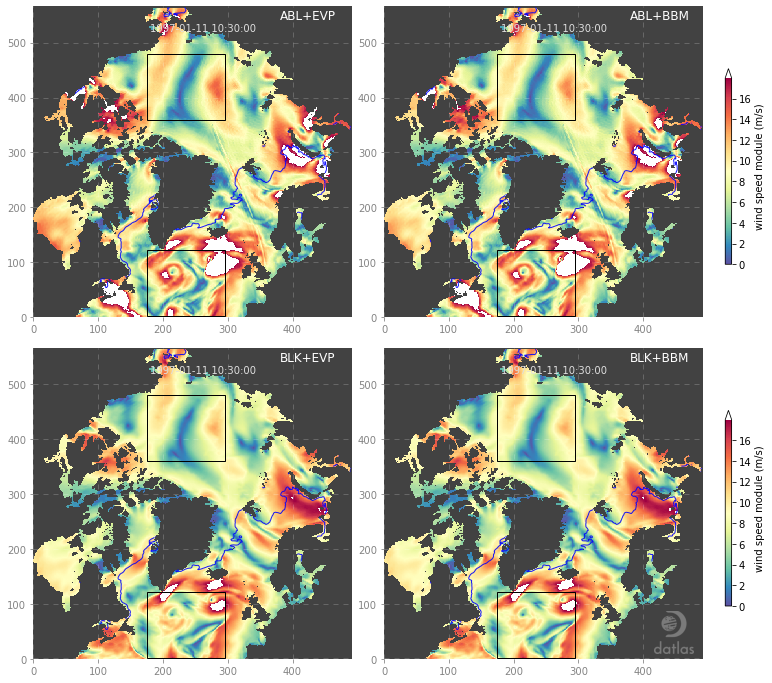

/gpfswork/rech/cli/regi915/PLT/2024-07/904/4pan_NANUK4_ICE_ABL-1h_windsp_0010.png


In [27]:
rect1=[175,300,355,480]
# sea ice
recti=[175,360,120,120]

# ocean
recto=[175,2,120,120]

# range of colorscale to use (min,max and nb of levels)
vmin=0
vmax=18
cblev=np.arange(vmin,vmax,2)

# loop on time-frames
for it in range(10,11,1):
    fig1,ax = li.Fplot4panels(allexps['ABLEVP903'],allexps['BLKEVP903'],allexps['ABLBBM903'],allexps['BLKBBM903'],'windsp',it,pltshow=True,
                              diro=diro,pltsave=True,varty=2,sicol='b',vmin=vmax,vmax=vmin,cblev=cblev,dpifig=600,
                              pltzone=False,distmask=distmask,
                              pltzoom=True,x1=recti[0], x2=recti[1], x3=recti[2], x4=recti[3],
                              pltzoom2=True,x1bis=recto[0], x2bis=recto[1], x3bis=recto[2], x4bis=recto[3],
                              Lzoom=False,zoom=rect1,textco='k',rectcol='k')
    

## Plot 4 panel maps over subregion centered on dist2coast region:

size of selected zone in gridpoints: 125, 125


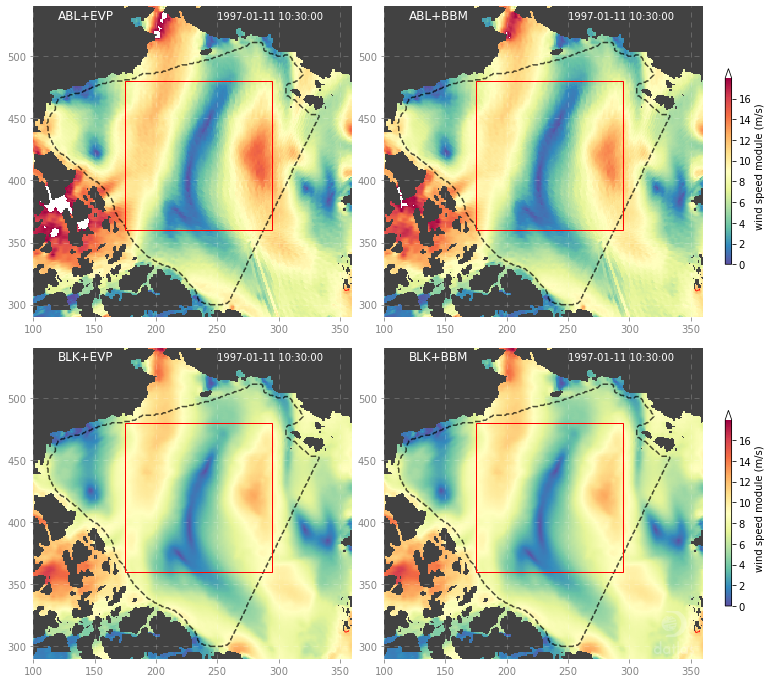

In [5]:
rect2=[100,360,290,540]

print("size of selected zone in gridpoints: "+str(rect1[1]-rect1[0])+ ", "+str(rect1[3]-rect1[2]))


# loop on time-frames
for it in range(10,11,1):
    fig1,ax = li.Fplot4panels(allexps['ABLEVP903'],allexps['BLKEVP903'],allexps['ABLBBM903'],allexps['BLKBBM903'],'windsp',it,pltshow=True,diro=diro+"maps/",pltsave=False,varty=2,sicol='r',vmin=vmax,vmax=vmin,cblev=cblev,dpifig=600,pltzone=True,distmask=distmask,Lzoom=True,zoom=rect2,textco='w',pltzoom=True,x1=recti[0], x2=recti[1], x3=recti[2], x4=recti[3])

## Select data for given variable over given subregion

In [23]:
# variable to consider
var2sp = 'windsp'

# type of file (oce, ice or abl)
typ = 'datoce'

# Store the subregion datasets in a single dictionary (here: subregion based on dist2coast mask)
subregions = {}
lonsubregions = {}
latsubregions = {}

for exp_key, exp_data in allexps.items():
    subregions[exp_key] = li.Fselectdistmask(exp_data, typ, var2sp, distmask)[0]
    #subregions[exp_key] = li.Fselectreg(exp_data, typ, var2sp, [recti[0],recti[0]+recti[2],recti[1],recti[1]+recti[3]])[0]
    #subregions[exp_key] = li.Fselectreg(exp_data, typ, var2sp, [recto[0],recto[0]+recto[2],recto[1],recto[1]+recto[3]])[0]
    #latsubregions[exp_key] = li.Fselectreg(exp_data, typ, var2sp, [recto[0],recto[0]+recto[2],recto[1],recto[1]+recto[3]])[3]
    #latsubregions[exp_key] = li.Fselectreg(exp_data, typ, var2sp, [recti[0],recti[0]+recti[2],recti[1],recti[1]+recti[3]])[3]
    


# Extract variable name and units from one of the experiment data sets
varnam = allexps['ABLBBM903'].datoce[var2sp].long_name
varunits = allexps['ABLBBM903'].datoce[var2sp].units
nb = allexps['ABLBBM903'].nbexp

## Compute temporal spectrum

In [24]:
#Specify the exp of which i want to compute the spectrum
selected_keys = ['ABLBBM903', 'BLKBBM903', 'ABLEVP903','BLKEVP903']

# Filter the subregions to keep only the selected experiments
selected_subregions = {key: subregions[key] for key in selected_keys if key in subregions}

# padding parameter set to 2
NPADDING = 2

# Perform FFT only on the selected experiments
SPtimes = [xscale.spectral.fft.fft(ds, dim='time_counter', dx=1., detrend='mean', nfft=ds.shape[0]*NPADDING, tapering=True) for ds in selected_subregions.values()]


# Initialize a list to store the mean PSD results
MEANPSDs = []

# Compute PSD from fft coeff, and then average over x and y for each entry in SPtimes
for SPtime in SPtimes:
    mean_psd = xscale.spectral.fft.psd(SPtime).mean(dim='x').mean(dim='y').load()
    MEANPSDs.append(mean_psd)


## Plot temporal spectrum for 4 experiments

ts1
ts2
ts3
ts4


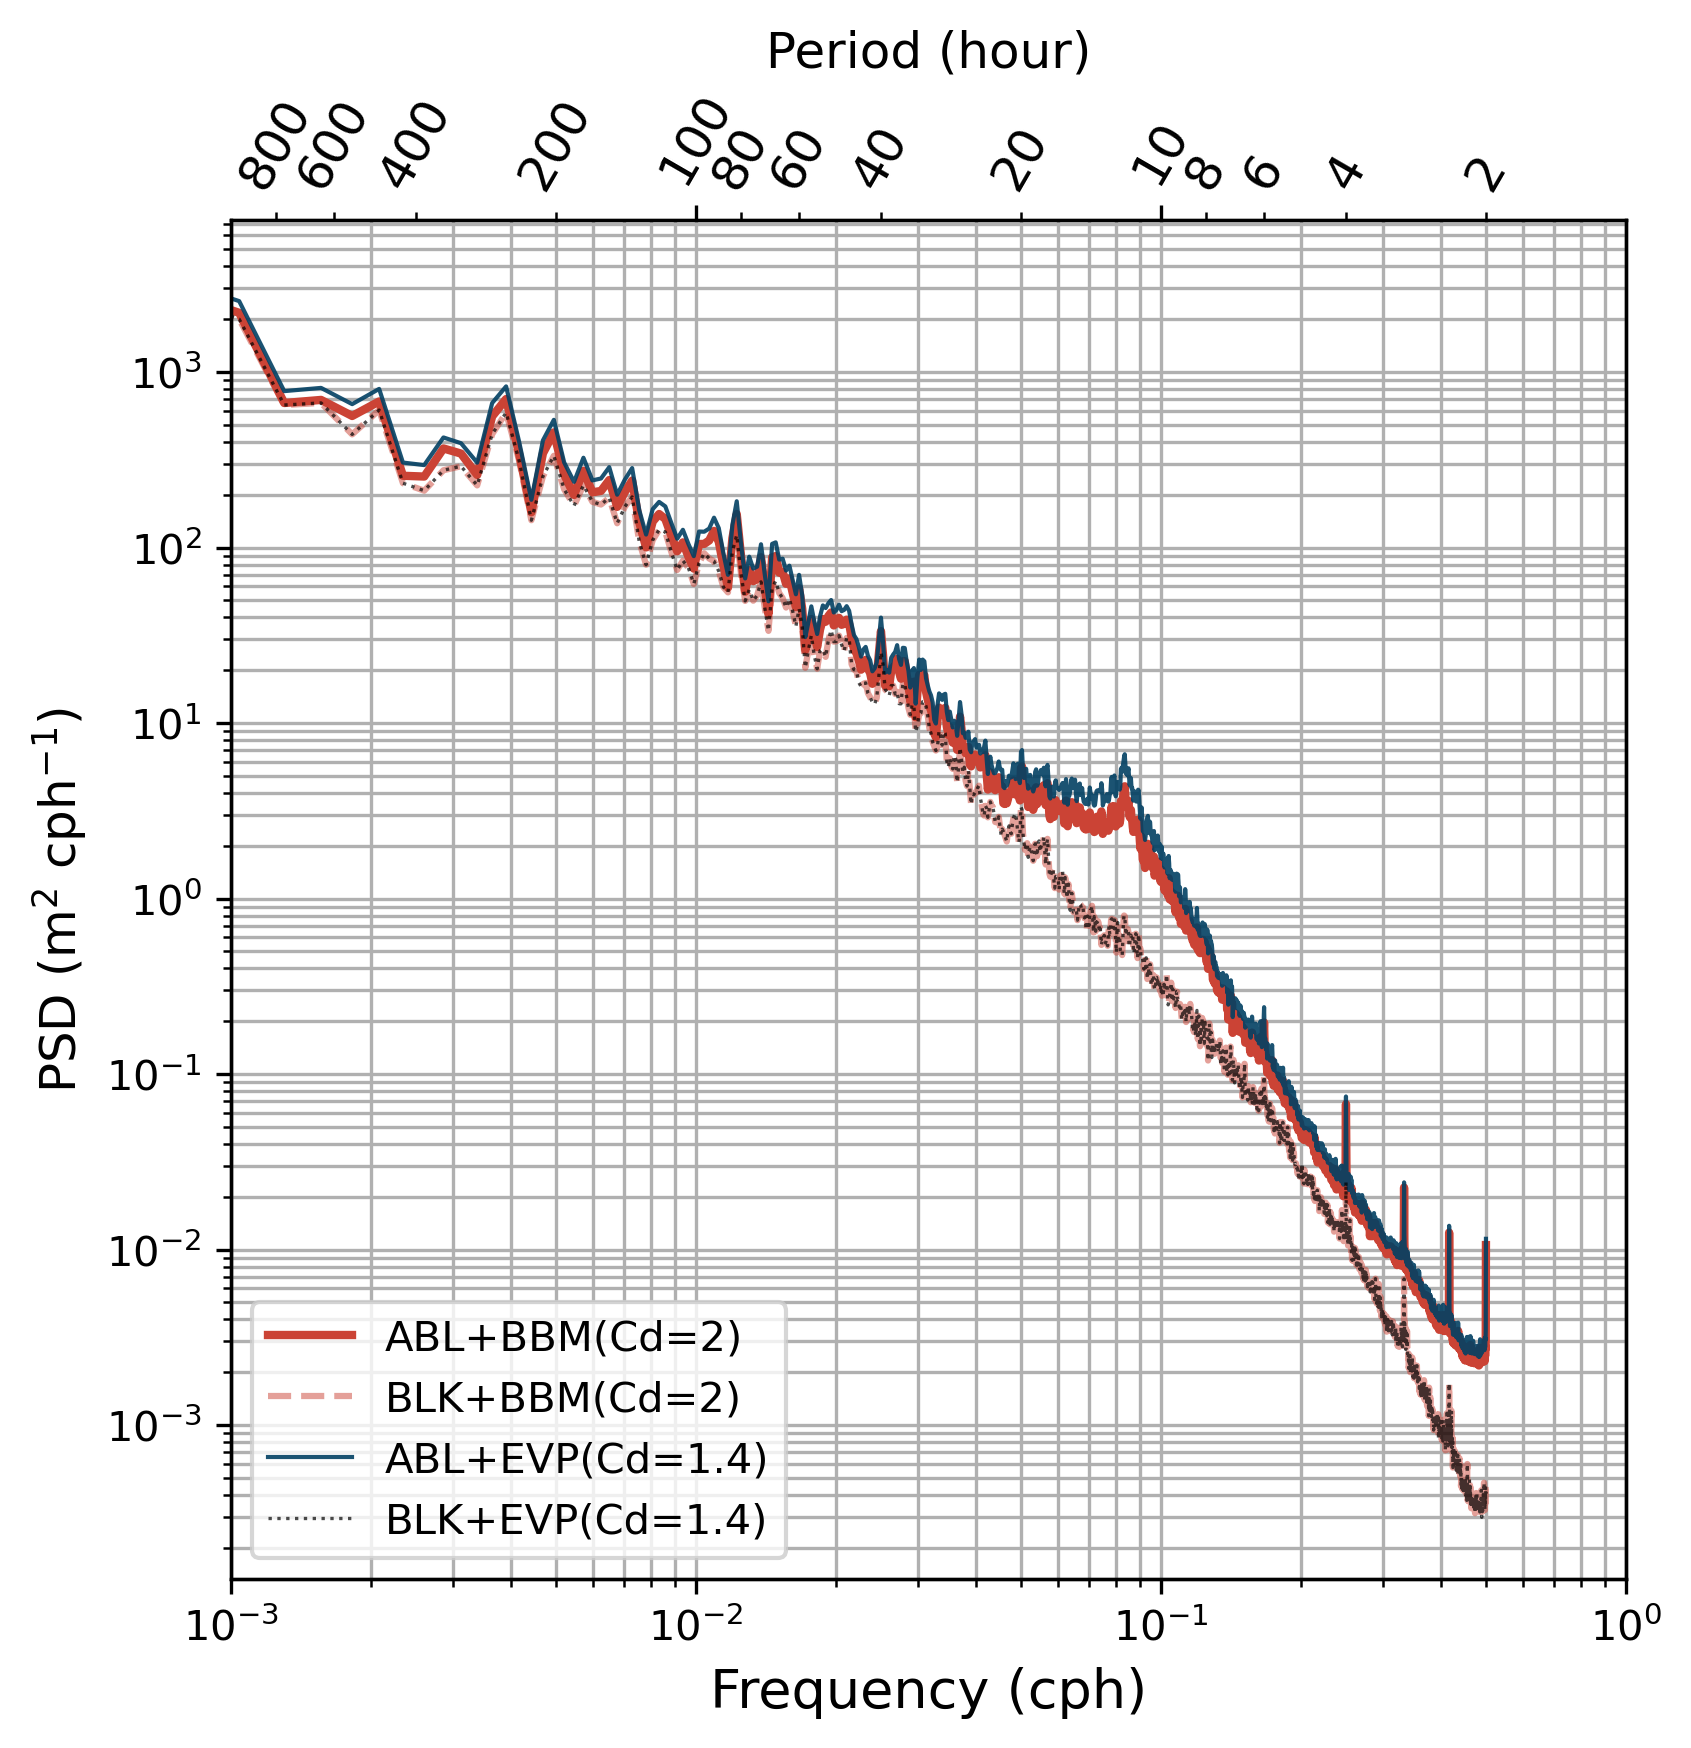

/gpfswork/rech/cli/regi915/PLT/2024-07/904/SP_903windsp_dist2coastmask.png.png


In [25]:
# PLOT


# Extract frequencies and drop 0
freqs = MEANPSDs[0].f_time_counter.values
freqs = freqs[NPADDING::]

# x-axis limits: (must be power exponents of 10: x-axis from 10 ** xmin to 10 ** xmax)
xmin = -3
xmax = 0

title = ''

fig = plt.figure(figsize=(6, 6), dpi=300, facecolor='white')

# Assuming the order of the mean PSDs in MEANPSDs list is correct
ax = li.FplotSP(
    freqs,
    MEANPSDs[0][NPADDING::],
    xmin,
    xmax,
    sp2=MEANPSDs[1][NPADDING::],
    sp3=MEANPSDs[2][NPADDING::],
    sp4=MEANPSDs[3][NPADDING::],
    ti1="ABL+BBM(Cd=2)",
    ti2="BLK+BBM(Cd=2)",
    ti3="ABL+EVP(Cd=1.4)",
    ti4="BLK+EVP(Cd=1.4)",
    title=title,
    co='#cb4335',
    co2='#cb4335',
    co3='#024063',
    co4='k'
)

plt.show()

filo = "SP_" + str(nb) + var2sp + '_dist2coastmask.png'

#filo = "SP_" + str(nb) + var2sp + '_rect-seaice.png'
#filo = "SP_" + str(nb) + var2sp + '_rect-ocean.png'

li.Fsaveplt(fig, diro, filo, dpifig=300)
plt.close('all')

In [22]:
thetadeg = 39
thetarad = (np.pi*thetadeg)/180

freq = np.pi/(np.sin(thetarad)*7.2921e-5)
freq/3600

19.016165671189018

In [38]:
1/0.06

16.666666666666668

In [15]:
latsubregions['ABLBBM903'].values.min()

71.66332916192641